# Activity 6
For this activity, let's consider the previous classification problem:

## Predicting Customer Churn in a Telecom Company
### Problem Overview
In this classification problem, the goal is to predict whether a customer will churn (leave) or stay with a telecom company based on several features such as customer demographics, service usage, and account information.

- Class label: Churn (1 = Yes, 0 = No)

    - 1: Customer has churned.
    - 0: Customer has stayed.
    
- Features
    - Customer ID: Unique identifier for each customer.
    - Gender: Whether the customer is male or female.
    - Age: Age of the customer.
    - Tenure: Number of months the customer has been with the company.
    - Service Plan: Type of service plan (e.g., Basic, Premium).
    - Monthly Charges: Monthly bill of the customer.
    - Total Charges: Total amount billed to the customer.
    - Internet Service: Whether the customer has internet service (Yes/No).
    - Tech Support: Whether the customer has tech support (Yes/No).
    - Paperless Billing: Whether the customer opts for paperless billing (Yes/No).
    - Payment Method: Payment method (e.g., Bank Transfer, Credit Card).
    - Contract Type: Contract type (e.g., Month-to-month, One year, Two year).
    - Phone Service: Whether the customer has phone service (Yes/No).
    - Multiple Lines: Whether the customer has multiple lines (Yes/No).
    
### Classification Models:
- K-Nearest Neighbors (KNN) density estimation
    - For density estimation, KNN can be used to estimate the probability density of a data point by looking at the nearest neighbors of that point.
- Support Vector Machine (SVM) with linear kernel for hard and soft margin
    - Linear SVM is the simplest form of SVM where the data is assumed to be linearly separable. It finds the hyperplane that best separates the data into two classes.
    - Hard Margin SVM aims to find the hyperplane that perfectly separates the classes with no margin violations (i.e., no points on the wrong side of the hyperplane). This is only possible when the data is perfectly linearly separable.
    - Soft margin SVM allows some margin violations (misclassifications) but penalizes them through a cost parameter C. The parameter C controls the trade-off between maximizing the margin and minimizing classification errors. A large C value makes the model more sensitive to misclassifications, while a smaller C allows more misclassifications but results in a wider margin.
- Non-Linear SVM
    - When the data is not linearly separable, we use non-linear kernels such as RBF (Radial Basis Function), Polynomial, and Sigmoid. These kernels transform the data into a higher-dimensional space where a linear separation is possible.
    - RBF is a popular non-linear kernel that maps the data into a higher-dimensional space using a Gaussian function.
    - A polynomial kernel uses polynomial functions to map the data into a higher-dimensional space. This can be useful when the data has non-linear relationships.
    - The sigmoid kernel uses a sigmoid function to map the data to a higher-dimensional space. It's less commonly used, but still an option.


### Dataset
We will use the same dataset we used in Activity 4. This dataset contains information for over 7000 customers.

## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from the file

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preliminary EDA

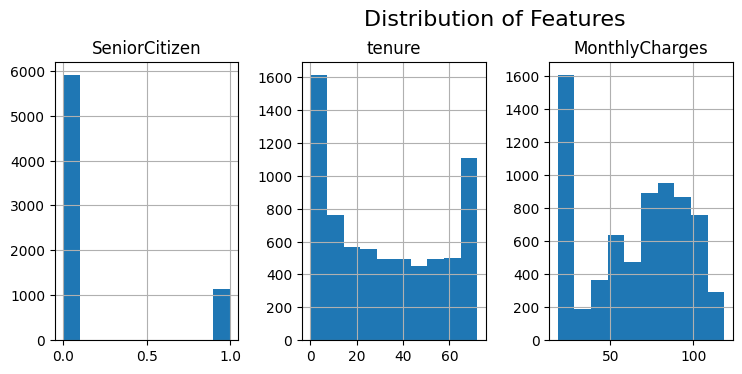

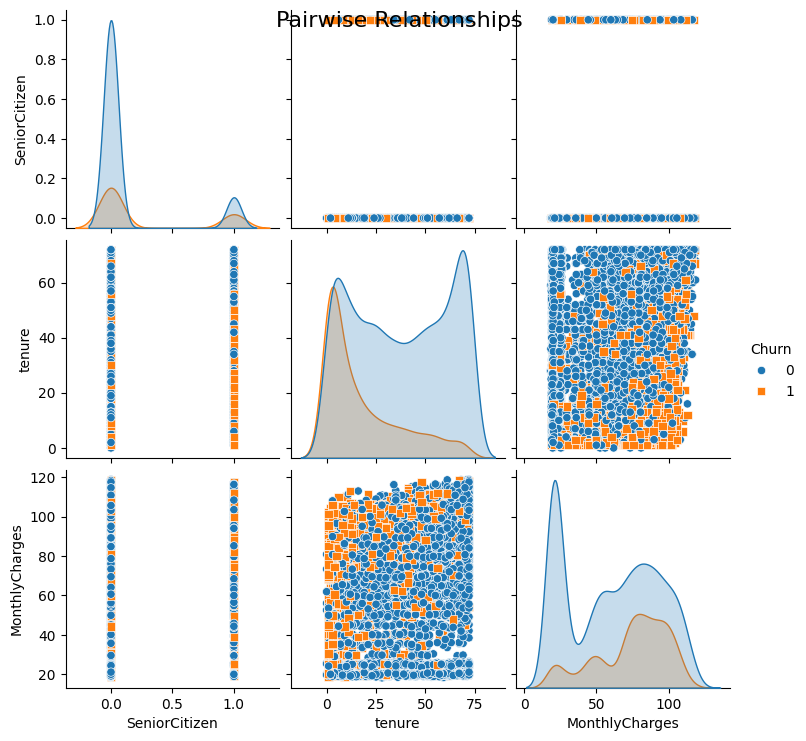

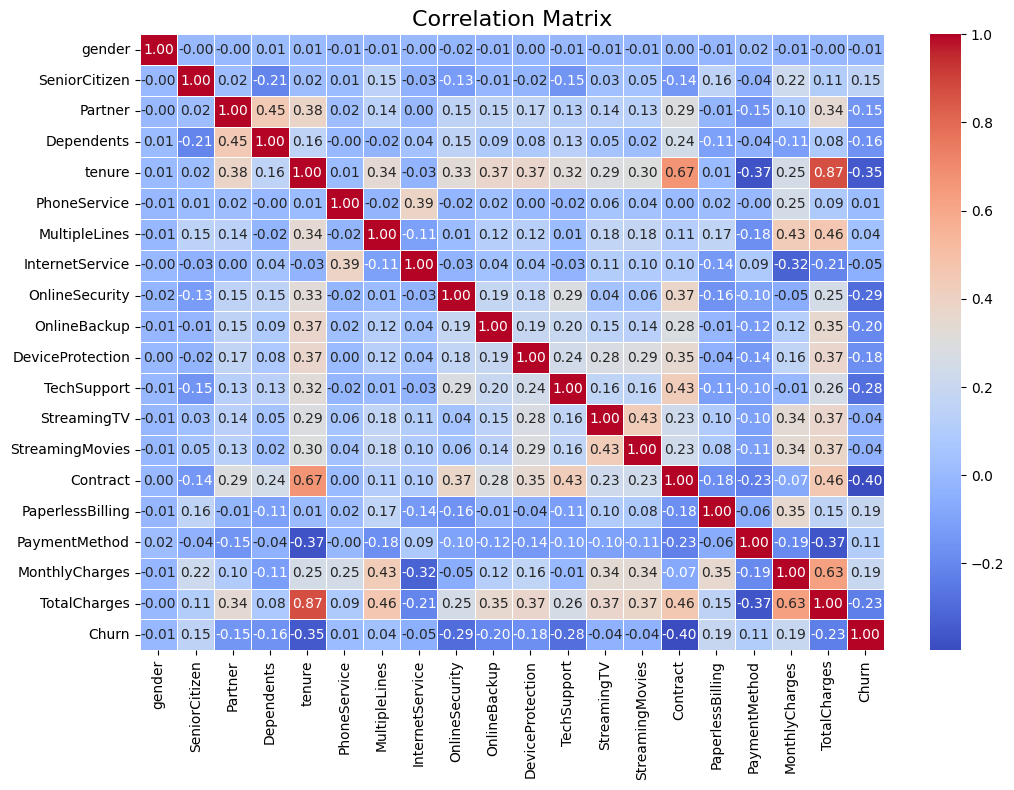

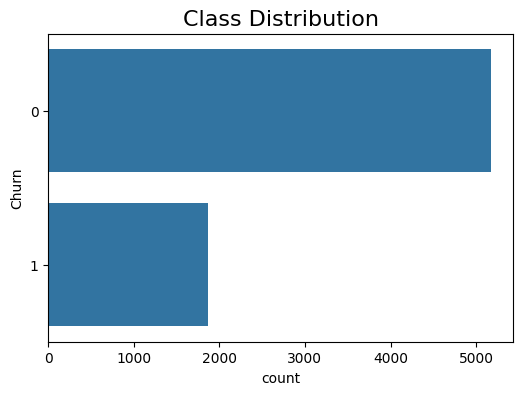

In [ ]:
# Exclude non-numeric columns (e.g., CustomerID, Churn, etc.) from numerical operations
df_cleaned = df.drop(columns=['customerID'])

# Identify numerical columns (you can also use df.select_dtypes() if needed)
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns (object, category)
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Impute missing values with the mean for numerical columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].mean())
# Impute missing values for categorical columns with the mode (most frequent value)
for column in categorical_columns:
    mode_value = df_cleaned[column].mode()[0]  # Get the most frequent value
    df_cleaned[column] = df_cleaned[column].fillna(mode_value)
    
# Convert 'TotalCharges' to numeric (force errors to NaN)
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

# Refill any NaN values in 'TotalCharges' (if any)
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].fillna(df_cleaned['TotalCharges'].mean())

# encoding for categorical variables
le = LabelEncoder()
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Split the data into features and target
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# Plot histograms for all features
X[numerical_columns].hist(bins=10, figsize=(10, 10), layout=(3, 4))
plt.suptitle('Distribution of Features', fontsize=16)
plt.tight_layout()
plt.show()

# Pairwise relationships between features (using pairplot)
sns.pairplot(df_cleaned, hue='Churn', vars=numerical_columns, markers=["o", "s"])
plt.suptitle('Pairwise Relationships', fontsize=16)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df_cleaned.corr()  # Compute the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned[numerical_columns], y=df_cleaned['Churn'])
plt.title('Class Distribution', fontsize=16)
plt.show()

# Identifying Outliers (Boxplots)
plt.figure(figsize=(24, 8))

# Create boxplots for all features
for i, feature in enumerate(X.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=y, y=feature, data=df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for KNN and Naive Bayes)
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Train Different Models

### Visualizing the difference between hard and soft margin SVM

In [ ]:
X_train_2D = X_train[['tenure', 'MonthlyCharges']]
X_test_2D = X_test[['tenure', 'MonthlyCharges']]

# Train a linear support vection machine with hard margin
hard_margin_svm_2D = SVC(kernel='linear', C=1e10)
hard_margin_svm_2D.fit(X_train_2D, y_train)

# Train a linear support vection machine with soft margin
soft_margin_svm_2D = SVC(kernel='linear', C=1)
soft_margin_svm_2D.fit(X_train_2D, y_train)

SVC(C=1, kernel='linear')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


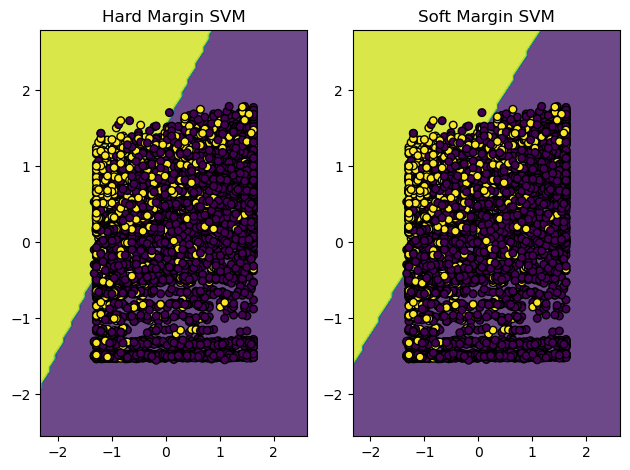

In [ ]:
# Create a plot to show their differences in the decision boundaries
# create a grid
x_min, x_max = X_train_2D[['tenure']].min() - 1, X_train_2D[['tenure']].max() + 1
y_min, y_max = X_train_2D[['MonthlyCharges']].min() - 1, X_train_2D[['MonthlyCharges']].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Plot hard margin SVM decision boundary
plt.subplot(1, 2, 1)
Z_hard = hard_margin_svm_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z_hard = Z_hard.reshape(xx.shape)
plt.contourf(xx, yy, Z_hard, alpha=0.8)
plt.scatter(X_train_2D[['tenure']], X_train_2D[['MonthlyCharges']], c=y_train, edgecolors='k', marker='o', s=30 )
plt.title("Hard Margin SVM")

# Plot hard margin SVM decision boundary
plt.subplot(1, 2, 2)
Z_soft = soft_margin_svm_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)
plt.contourf(xx, yy, Z_soft, alpha=0.8)
plt.scatter(X_train_2D[['tenure']], X_train_2D[['MonthlyCharges']], c=y_train, edgecolors='k', marker='o', s=30 )
plt.title("Soft Margin SVM")

plt.tight_layout()
plt.show()

### Linear SVM

In [ ]:
# train the linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

### Non-linear SVMs

In [ ]:
# train the RBF SVM
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

# train the Polynomial SVM
poly_svm = SVC(kernel='poly')
poly_svm.fit(X_train, y_train)

SVC(kernel='poly')

### Hyperparameter tuning in RBF SVM

In [ ]:
# hyperparameter tuning in RBF
param_grid = {'C': [0.1, 1],
              'gamma': ['scale', 'auto'],
              'kernel': ['rbf']
    
}

svm = SVC()
random_search = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Best parameters and results
best_svm = random_search.best_estimator_
print("Best parameters found:", best_svm)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found: SVC(C=1, gamma='auto')


### KNN Density Estimation for Classification
KNN is generally used as a classifier by considering the majority vote of the k nearest neighbors. Howeever, for density estimation, we look at how the KNN algorithm can be used to estimate the likelihood of the target variable for a given data point.
In a KNN density estimation setup, we would typically be interested in:
- **Probability Estimation**: The probability of a class for a given point can be approximated by the proportion of neighbors that belong to that class. For example, if 3 out of the 5 nearest neighbors of a data point belong to class 1 (churn), the estimated probability of that point belonging to the class 1 is 0.6.

However, for simplicity, we will use KNN as a classifier directly since it fits with the task more naturally and use it predict via probability estimation.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Hyper parameter tuning

In [ ]:
#define the parameters for param grid of KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski']
    
}

# GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best parameters found:", best_knn)

Best parameters found: KNeighborsClassifier(metric='manhattan', n_neighbors=11)


## Model Evaluation

#### Predictions

In [ ]:
y_pred_lsvm_tr = linear_svm.predict(X_train)
y_pred_lsvm_tt = linear_svm.predict(X_test)

y_pred_rbf_tr = rbf_svm.predict(X_train)
y_pred_rbf_tt = rbf_svm.predict(X_test)

y_pred_poly_tr = poly_svm.predict(X_train)
y_pred_poly_tt = poly_svm.predict(X_test)

y_pred_bsvm_tr = best_svm.predict(X_train)
y_pred_bsvm_tt = best_svm.predict(X_test)

y_prob_knn_tr = knn.predict_proba(X_train)
y_prob_knn_tt = knn.predict_proba(X_test)

y_pred_knn_tr = (y_prob_knn_tr[:, 1] > 0.5).astype(int)
y_pred_knn_tt = (y_prob_knn_tt[:, 1] > 0.5).astype(int)

y_prob_bknn_tr = best_knn.predict_proba(X_train)
y_prob_bknn_tt = best_knn.predict_proba(X_test)

y_pred_bknn_tr = (y_prob_bknn_tr[:, 1] > 0.5).astype(int)
y_pred_bknn_tt = (y_prob_bknn_tt[:, 1] > 0.5).astype(int)

#### Performance Measurement

In [ ]:
accuracy = {}
accuracy['Linear SVM'] = [round(accuracy_score(y_train, y_pred_lsvm_tr), 3), round(accuracy_score(y_test, y_pred_lsvm_tt), 3)]
accuracy['RBF SVM'] = [round(accuracy_score(y_train, y_pred_rbf_tr), 3), round(accuracy_score(y_test, y_pred_rbf_tt), 3)]
accuracy['Poly SVM'] = [round(accuracy_score(y_train, y_pred_poly_tr), 3), round(accuracy_score(y_test, y_pred_poly_tt), 3)]
accuracy['Tuned RBF SVM'] = [round(accuracy_score(y_train, y_pred_bsvm_tr), 3), round(accuracy_score(y_test, y_pred_bsvm_tt), 3)]
accuracy['KNN DE'] = [round(accuracy_score(y_train, y_pred_knn_tr), 3), round(accuracy_score(y_test, y_pred_knn_tt), 3)]
accuracy['Tuned KNN DE'] = [round(accuracy_score(y_train, y_pred_bknn_tr), 3), round(accuracy_score(y_test, y_pred_bknn_tt), 3)]

## Performance Comparison

In [ ]:
accuracy_df = pd.DataFrame(accuracy, index=['Training Set', 'Testing Set']).T
accuracy_df

,Training Set,Testing Set
Linear SVM,0.792,0.802
RBF SVM,0.734,0.735
Poly SVM,0.734,0.735
Tuned RBF SVM,0.907,0.763
KNN DE,0.806,0.737
Tuned KNN DE,0.797,0.771


### Conclusion?